In [1]:
import jupyter_utils as j

j.reload(j)

In [29]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score

from matplotlib import pyplot as plt

import matplotlib

matplotlib.style.use('ggplot')

j.apply_options(pd)
j.reload(j)

%matplotlib inline

In [6]:
data = pd.read_csv('sparkify_data_final.csv') 

pd.set_option('use_inf_as_na', True)
data = data.dropna()
data = data.drop(list(filter(lambda c: len(c) == 2, data.columns)), axis = 1)

data.head(10)

,canceled,male,paid,avg_daily_actions,avg_session_duration,n_actions,n_added_to_playlist,n_ads,n_days,n_dislikes,n_downgrades,n_errors,n_friends,n_help,n_home,n_likes,n_sess,n_settings,n_songs,n_upgrades,session_avg_actions,session_avg_added_playlist,session_avg_ads,session_avg_dislikes,session_avg_errors,session_avg_friends,session_avg_help,session_avg_home,session_avg_likes,session_avg_playback,session_avg_settings,session_avg_songs,session_avg_time_away,time_window
0,1,0,0,68.500000,3.507733,137,1,22,2,3,0,0,3,0,3,4,2,0,96,0,19.536542,0.142602,3.137255,0.427807,0.000000,0.427807,0.000000,0.427807,0.570410,1.024795,0.000000,13.689840,66.022500,73.035000
1,1,1,0,65.833333,5.758219,395,6,11,6,5,0,0,2,1,23,15,5,2,310,1,18.018703,0.273702,0.501787,0.228085,0.000000,0.091234,0.045617,1.049190,0.684255,0.997185,0.091234,14.141261,166.991528,689.887778
2,1,0,1,30.400000,2.761294,152,3,9,5,0,0,0,2,2,7,8,5,1,112,1,18.797018,0.370994,1.112981,0.000000,0.000000,0.247329,0.247329,0.865652,0.989317,0.972627,0.123665,13.850435,47.248056,197.078611
3,0,1,0,28.000000,2.938208,84,2,6,3,1,0,0,3,2,2,3,3,3,62,0,19.768582,0.470681,1.412042,0.235340,0.000000,0.706021,0.470681,0.470681,0.706021,1.033783,0.706021,14.591096,522.412639,1049.074444
4,1,0,1,107.800000,14.717388,2156,45,1,20,15,0,0,26,10,70,102,17,15,1826,0,17.074185,0.356372,0.007919,0.118791,0.000000,0.205904,0.079194,0.554357,0.807777,1.067369,0.118791,14.460789,53.600208,983.875833
5,1,1,1,54.666667,7.115083,328,8,1,6,1,0,2,3,0,17,16,5,2,266,0,17.916698,0.436993,0.054624,0.054624,0.109248,0.163872,0.000000,0.928609,0.873985,1.013841,0.109248,14.530005,87.977986,370.218889
6,0,1,0,40.000000,3.818930,600,6,35,15,4,0,0,16,3,36,12,15,5,462,0,18.872046,0.188720,1.100869,0.125814,0.000000,0.503255,0.094360,1.132323,0.377441,1.013385,0.157267,14.531475,95.152480,1363.927778
7,1,1,0,25.833333,1.925077,155,4,9,6,3,0,0,2,0,6,5,7,1,122,0,19.535079,0.504131,1.134295,0.378098,0.000000,0.252066,0.000000,0.756197,0.630164,1.054349,0.126033,15.375998,60.725833,372.289444
8,0,1,0,18.625000,1.202651,149,0,13,8,0,0,0,6,0,6,6,8,3,112,0,20.467033,0.000000,1.785714,0.000000,0.000000,0.824176,0.000000,0.824176,0.824176,1.069652,0.412088,15.384615,201.516190,1417.893333
9,0,0,1,138.222222,21.700945,1244,25,0,9,10,0,1,21,11,43,50,5,3,1048,0,17.075793,0.343163,0.000000,0.137265,0.013727,0.288257,0.150992,0.590240,0.686326,1.005280,0.041180,14.385395,269.713125,1151.704167


In [13]:
from sklearn.preprocessing import Normalizer, RobustScaler, StandardScaler

# Remove binary features
features_to_normalize = list(data.drop(['canceled', 'male', 'paid'], axis = 1).columns)

_x = data.copy()
_x[features_to_normalize] = Normalizer().fit_transform(_x[features_to_normalize]) 

_x.head(10)

,canceled,male,paid,avg_daily_actions,avg_session_duration,n_actions,n_added_to_playlist,n_ads,n_days,n_dislikes,n_downgrades,n_errors,n_friends,n_help,n_home,n_likes,n_sess,n_settings,n_songs,n_upgrades,session_avg_actions,session_avg_added_playlist,session_avg_ads,session_avg_dislikes,session_avg_errors,session_avg_friends,session_avg_help,session_avg_home,session_avg_likes,session_avg_playback,session_avg_settings,session_avg_songs,session_avg_time_away,time_window
0,1,0,0,0.328434,0.016818,0.656868,0.004795,0.105483,0.009589,0.014384,0.0,0.000000,0.014384,0.000000,0.014384,0.019179,0.009589,0.000000,0.460287,0.000000,0.093671,0.000684,0.015042,0.002051,0.000000,0.002051,0.000000,0.002051,0.002735,0.004914,0.000000,0.065638,0.316555,0.350178
1,1,1,0,0.075424,0.006597,0.452543,0.006874,0.012602,0.006874,0.005728,0.0,0.000000,0.002291,0.001146,0.026351,0.017185,0.005728,0.002291,0.355160,0.001146,0.020644,0.000314,0.000575,0.000261,0.000000,0.000105,0.000052,0.001202,0.000784,0.001142,0.000105,0.016201,0.191319,0.790390
2,1,0,1,0.108527,0.009858,0.542634,0.010710,0.032130,0.017850,0.000000,0.0,0.000000,0.007140,0.007140,0.024990,0.028560,0.017850,0.003570,0.399836,0.003570,0.067105,0.001324,0.003973,0.000000,0.000000,0.000883,0.000883,0.003090,0.003532,0.003472,0.000441,0.049446,0.168674,0.703563
3,0,1,0,0.023785,0.002496,0.071354,0.001699,0.005097,0.002548,0.000849,0.0,0.000000,0.002548,0.001699,0.001699,0.002548,0.002548,0.002548,0.052666,0.000000,0.016792,0.000400,0.001199,0.000200,0.000000,0.000600,0.000400,0.000400,0.000600,0.000878,0.000600,0.012394,0.443765,0.891139
4,1,0,1,0.035963,0.004910,0.719263,0.015012,0.000334,0.006672,0.005004,0.0,0.000000,0.008674,0.003336,0.023353,0.034028,0.005671,0.005004,0.609172,0.000000,0.005696,0.000119,0.000003,0.000040,0.000000,0.000069,0.000026,0.000185,0.000269,0.000356,0.000040,0.004824,0.017882,0.328231
5,1,1,1,0.095539,0.012435,0.573233,0.013981,0.001748,0.010486,0.001748,0.0,0.003495,0.005243,0.000000,0.029710,0.027963,0.008738,0.003495,0.464878,0.000000,0.031312,0.000764,0.000095,0.000095,0.000191,0.000286,0.000000,0.001623,0.001527,0.001772,0.000191,0.025394,0.153756,0.647017
6,0,1,0,0.025563,0.002441,0.383448,0.003834,0.022368,0.009586,0.002556,0.0,0.000000,0.010225,0.001917,0.023007,0.007669,0.009586,0.003195,0.295255,0.000000,0.012061,0.000121,0.000704,0.000080,0.000000,0.000322,0.000060,0.000724,0.000241,0.000648,0.000101,0.009287,0.060810,0.871659
7,1,1,0,0.060431,0.004503,0.362583,0.009357,0.021053,0.014035,0.007018,0.0,0.000000,0.004678,0.000000,0.014035,0.011696,0.016375,0.002339,0.285388,0.000000,0.045697,0.001179,0.002653,0.000884,0.000000,0.000590,0.000000,0.001769,0.001474,0.002466,0.000295,0.035968,0.142053,0.870877
8,0,1,0,0.012892,0.000832,0.103135,0.000000,0.008998,0.005537,0.000000,0.0,0.000000,0.004153,0.000000,0.004153,0.004153,0.005537,0.002077,0.077524,0.000000,0.014167,0.000000,0.001236,0.000000,0.000000,0.000570,0.000000,0.000570,0.000570,0.000740,0.000285,0.010649,0.139485,0.981435
9,0,0,1,0.068507,0.010756,0.616565,0.012391,0.000000,0.004461,0.004956,0.0,0.000496,0.010408,0.005452,0.021312,0.024782,0.002478,0.001487,0.519421,0.000000,0.008463,0.000170,0.000000,0.000068,0.000007,0.000143,0.000075,0.000293,0.000340,0.000498,0.000020,0.007130,0.133678,0.570820


In [35]:
def plot_roc_curve(y_test, y_predictions, model, action = 'Training'):
    
    fp, tp, _ = roc_curve(y_test, y_predictions)
    auc = roc_auc_score(y_test, y_predictions)
    
    plt.figure()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fp, tp, color = 'darkorange', label = model.__class__.__name__)
    
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(f'{action} - ROC curve (area = {np.around(auc, 4)})')
    plt.legend(loc = 'best')
    plt.show()
    
def plot_metrics(y_test, y_predictions):
    
    auc = roc_auc_score(y_test, y_predictions)
    cm = confusion_matrix(y_test, y_predictions, labels = [1, 0])
    
    tn = cm[0, 0]
    tp = cm[1, 1]
    fn = cm[1, 0]
    fp = cm[0, 1]
    
    total = np.sum(cm) # tn + tp + fn + fp
    accuracy = (tp + tn) / total
    precision = (tp) / (tp + fp)
    recall = (tp) / (tp + fn) 
    
    print(cm)
    print('')
    print('accuracy.................%7.4f' % accuracy)
    print('precision................%7.4f' % precision)
    print('recall...................%7.4f' % recall)
    print('auc......................%7.4f' % auc)
    print('F1 macro.................%7.4f' % f1_score(y_test, y_predictions, average = 'macro'))
    print('F1 micro.................%7.4f' % f1_score(y_test, y_predictions, average = 'micro'))
    print('F1 weighted..............%7.4f' % f1_score(y_test, y_predictions, average = 'weighted'))
    # f1 = (2 * tp ) / (2 * tp + fp + fn) - f1_score with average 'binary'
    print('F1 binary................%7.4f' % f1_score(y_test, y_predictions, average = 'binary', labels = [1, 0]))
    
def train_model(df, label, classifier): 

    x = df.drop([label], axis = 1)
    y = df[label]

    X_train, X_test, y_train, y_test = split(x, y, test_size = .2, random_state = 42)
    
    model = classifier.fit(X_train, y_train)
    
    # Train
    y_predicted = model.predict(X_train)
    plot_roc_curve(y_train, y_predicted, model)
    plot_metrics(y_train, y_predicted)
    
    # Testing
    y_predicted = model.predict(X_test)
    plot_roc_curve(y_test, y_predicted, model, 'Testing')
    plot_metrics(y_test, y_predicted)
    
    return model

def train_extra_trees_classifier(df, label):
    
    cl = ExtraTreesClassifier(n_jobs = -1, 
                              class_weight = 'balanced', 
                              bootstrap = True,
                              criterion = 'gini', 
                              random_state = 42, 
                              max_features = .55, 
                              min_samples_leaf = 2, 
                              min_samples_split = 16, 
                              n_estimators = 100)
    
    return train_model(df, label, cl)

def train_random_forest(df, label):
    
    cl = RandomForestClassifier(n_estimators = 100, n_jobs = -1, class_weight = 'balanced', criterion = 'gini', random_state = 42)
    return train_model(df, label, cl)

def train_logistic_regression(df, label):
    
    lr = LogisticRegression(solver = 'lbfgs', n_jobs = -1, class_weight = 'balanced', random_state = 42)
    return train_model(df, label, lr)

def train_gradient_boosting(df, label): 
    gbl = GradientBoostingClassifier(n_estimators = 200, max_depth = 6, learning_rate = 0.1, random_state = 42)
    return train_model(df, label, gbl)


from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import fbeta_score, recall_score

f1 = make_scorer(f1_score, average = 'binary') # 0.000000001

# f1 = make_scorer(recall_score , average = 'binary',  labels = [1, 0])


from sklearn.model_selection import ShuffleSplit

def train_gs_gradient_boosting(df, label):
    
    kfold = StratifiedKFold(n_splits=3, shuffle=False, random_state=42)
    
    grid_values = {
        # 'subsample': [0.1, 0.5, 0.9, 0.95, 0.99],
        # 'min_samples_split' : [.1, .2, .3, .5, .8, 1.0],
        'n_estimators': [100, 200, 300, 400],
        # 'learning_rate': [0.25, .1, 0.05, 0.02, 0.01], #, 0.015, 0.001],
        # 'max_depth': [4, 6, 8, 10],
        # 'max_features': [7, 14, 25, 30, 32],
        'min_samples_leaf': [1, 20, 50, 100, 150]
    }

    gb = GradientBoostingClassifier()
    # gb_gs = GridSearchCV(gb, param_grid = grid_values, return_train_score = True, verbose = 3, n_jobs = -1, cv = kfold, iid = False, scoring = f1)
    
    # Test
    x = df.drop([label], axis = 1)
    y = df[label]
    
    X_train, X_test, y_train, y_test = split(x, y, test_size = .3, random_state = 42)
    

    cv = ShuffleSplit(len(_x), test_size=0.3, random_state=42)
    
    # cv = StratifiedKFold(n_splits=3, shuffle=False, random_state=42).split(X_train, y_train)
    
    gb_gs = GridSearchCV(gb, param_grid = grid_values, return_train_score = True, verbose = 3, n_jobs = -1, cv = None, iid = False, scoring = 'roc_auc')
     
    model = gb_gs.fit(X_train, y_train)
 
    y_predicted = model.predict(X_test)
    plot_roc_curve(y_test, y_predicted, model, 'Testing')
    plot_metrics(y_test, y_predicted)
    
 
    return model

    # return train_model(df, label, gb_gs)

def train_gs_logistic_regression(df, label):
    
    grid_values = {
        'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],  
        # 'penalty': [ 'l2' ], 
        # 'C': [.1, .4, 1, 2, 4, 6, 8, 10, 12, 20], 
        'max_iter': [50, 100, 200, 300, 500, 1000, 2000]
    }

    lr = LogisticRegression(n_jobs = -1, class_weight = 'balanced', random_state = 42)
    lg_gs = GridSearchCV(lr, param_grid = grid_values, return_train_score = True, verbose = 3, n_jobs = -1, cv = 10, scoring = 'roc_auc', iid = False)
    
    return train_model(df, label, lg_gs)
    
    
    
def train_gs_random_forest(df, label):
    
    rf = RandomForestClassifier(n_jobs = -1, class_weight = 'balanced', criterion = 'gini', random_state = 42)
    
    grid_values = {
        'bootstrap': [True, False],
        'oob_score': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 
        'max_features': ['auto', 'sqrt', 'log2'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    }
    
    rf_gs = GridSearchCV(rf, param_grid = grid_values, return_train_score = True, verbose = 3, n_jobs = -1, cv = 3, scoring = f1, iid = False)
    
    return train_model(df, label, rf_gs)

In [14]:
from sklearn.model_selection import ShuffleSplit

ShuffleSplit(len(_x), test_size = .3, random_state=0)

ShuffleSplit(n_splits=448, random_state=0, test_size=0.3, train_size=None)

## Random Forest

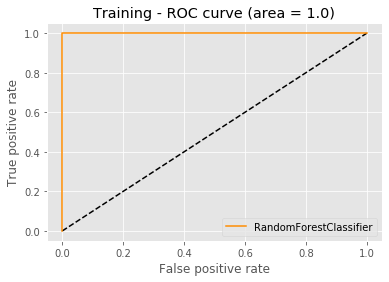

[[ 78   0]
 [  0 280]]

accuracy................. 1.0000
precision................ 1.0000
recall................... 1.0000
auc...................... 1.0000
F1 macro................. 1.0000
F1 micro................. 1.0000
F1 weighted.............. 1.0000
F1 binary................ 1.0000


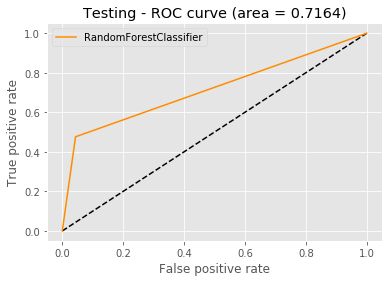

[[10 11]
 [ 3 66]]

accuracy................. 0.8444
precision................ 0.8571
recall................... 0.9565
auc...................... 0.7164
F1 macro................. 0.7462
F1 micro................. 0.8444
F1 weighted.............. 0.8304
F1 binary................ 0.5882


In [15]:
model = train_random_forest(_x, 'canceled')

In [17]:
importances = pd.Series(model.feature_importances_, index = list(data.drop(['canceled'], axis = 1).columns)).to_frame().reset_index()
importances.columns = ['feature', 'importance']
importances.sort_values(by = 'importance', ascending = False)

,feature,importance
32,time_window,0.081748
2,avg_daily_actions,0.062306
4,n_actions,0.062071
13,n_home,0.053749
14,n_likes,0.045794
30,session_avg_songs,0.045733
17,n_songs,0.044071
19,session_avg_actions,0.042785
28,session_avg_playback,0.038420
15,n_sess,0.036981


## Gradient Boosting

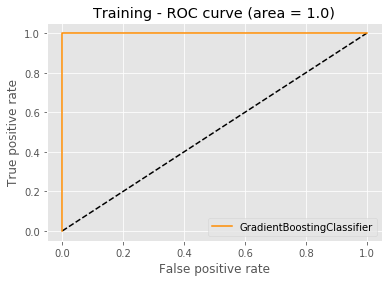

[[ 78   0]
 [  0 280]]

accuracy................. 1.0000
precision................ 1.0000
recall................... 1.0000
auc...................... 1.0000
F1 macro................. 1.0000
F1 micro................. 1.0000
F1 weighted.............. 1.0000
F1 binary................ 1.0000


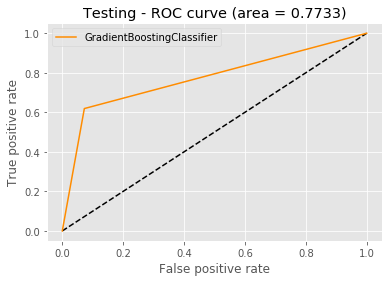

[[13  8]
 [ 5 64]]

accuracy................. 0.8556
precision................ 0.8889
recall................... 0.9275
auc...................... 0.7733
F1 macro................. 0.7872
F1 micro................. 0.8556
F1 weighted.............. 0.8515
F1 binary................ 0.6667


In [18]:
model = train_gradient_boosting(_x, 'canceled')

In [20]:
importances = pd.Series(model.feature_importances_, index = list(data.drop(['canceled'], axis = 1).columns)).to_frame().reset_index()
importances.columns = ['feature', 'importance']
importances.sort_values(by = 'importance', ascending = False)

,feature,importance
6,n_ads,0.139794
29,session_avg_settings,0.101757
32,time_window,0.080774
28,session_avg_playback,0.074216
4,n_actions,0.059921
2,avg_daily_actions,0.059165
31,session_avg_time_away,0.046500
11,n_friends,0.041863
13,n_home,0.040856
19,session_avg_actions,0.039821


## Logistic Regression

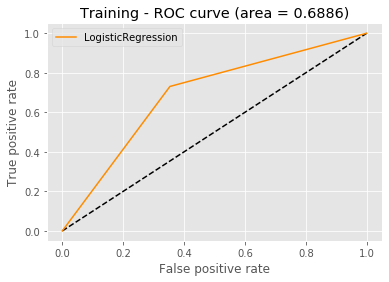

[[ 57  21]
 [ 99 181]]

accuracy................. 0.6648
precision................ 0.8960
recall................... 0.6464
auc...................... 0.6886
F1 macro................. 0.6191
F1 micro................. 0.6648
F1 weighted.............. 0.6935
F1 binary................ 0.4872


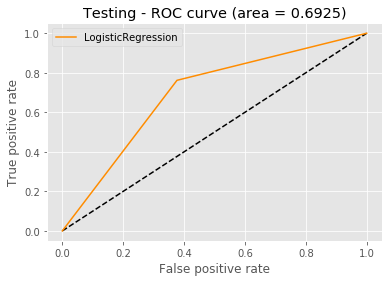

[[16  5]
 [26 43]]

accuracy................. 0.6556
precision................ 0.8958
recall................... 0.6232
auc...................... 0.6925
F1 macro................. 0.6215
F1 micro................. 0.6556
F1 weighted.............. 0.6821
F1 binary................ 0.5079


In [21]:
model = train_logistic_regression(_x, 'canceled')

In [28]:
importances = pd.Series(list(model.coef_[0]), index = list(data.drop(['canceled'], axis = 1).columns)).to_frame().reset_index()
importances.columns = ['feature', 'importance']
importances.sort_values(by = 'importance', ascending = False)

,feature,importance
4,n_actions,2.035683
2,avg_daily_actions,1.280831
6,n_ads,0.757585
31,session_avg_time_away,0.742954
17,n_songs,0.626736
13,n_home,0.189430
21,session_avg_ads,0.152094
0,male,0.142240
3,avg_session_duration,0.134081
15,n_sess,0.104755


## ExtraTreesClassifier

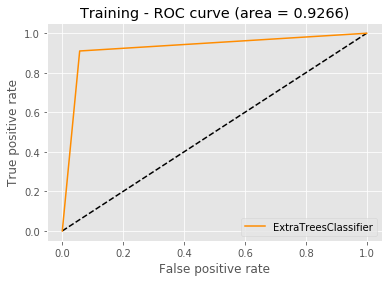

[[ 71   7]
 [ 16 264]]

accuracy................. 0.9358
precision................ 0.9742
recall................... 0.9429
auc...................... 0.9266
F1 macro................. 0.9094
F1 micro................. 0.9358
F1 weighted.............. 0.9370
F1 binary................ 0.8606


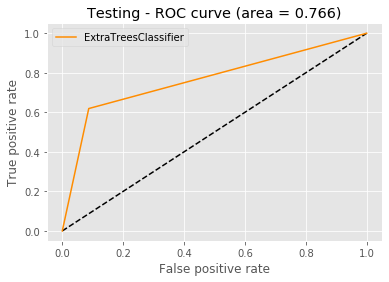

[[13  8]
 [ 6 63]]

accuracy................. 0.8444
precision................ 0.8873
recall................... 0.9130
auc...................... 0.7660
F1 macro................. 0.7750
F1 micro................. 0.8444
F1 weighted.............. 0.8417
F1 binary................ 0.6500


In [36]:
model = train_extra_trees_classifier(_x, 'canceled')

In [37]:
importances = pd.Series(model.feature_importances_, index = list(data.drop(['canceled'], axis = 1).columns)).to_frame().reset_index()
importances.columns = ['feature', 'importance']
importances.sort_values(by = 'importance', ascending = False)

,feature,importance
32,time_window,0.099201
4,n_actions,0.084081
6,n_ads,0.062845
17,n_songs,0.053066
16,n_settings,0.051327
3,avg_session_duration,0.049041
2,avg_daily_actions,0.046711
13,n_home,0.035634
18,n_upgrades,0.034793
14,n_likes,0.032638


Fitting 3 folds for each of 4356 candidates, totalling 13068 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 2016 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 3840 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 4576 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 5376 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 6240 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 8160 tasks      |

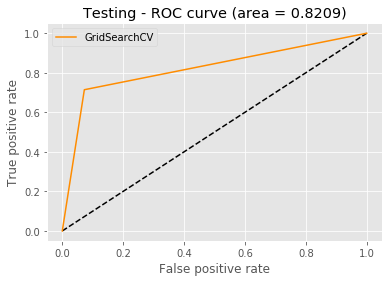

[[15  6]
 [ 5 64]]

accuracy................. 0.8778
precision................ 0.9143
recall................... 0.9275
auc...................... 0.8209
F1 macro................. 0.8263
F1 micro................. 0.8778
F1 weighted.............. 0.8767
F1 binary................ 0.7317


RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=400, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [34]:
model = train_gs_random_forest(_x, 'canceled')

model.best_estimator_

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  29 out of  60 | elapsed:    0.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  60 | elapsed:    0.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished


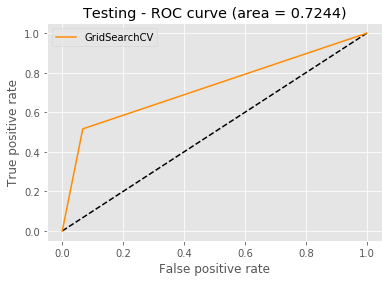

[[16 15]
 [ 7 97]]

accuracy................. 0.8370
precision................ 0.8661
recall................... 0.9327
auc...................... 0.7244
F1 macro................. 0.7454
F1 micro................. 0.8370
F1 weighted.............. 0.8280
F1 binary................ 0.5926


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [556]:
model = train_gs_gradient_boosting(_x, 'canceled')

model.best_estimator_

Fitting 3 folds for each of 50400 candidates, totalling 151200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 2016 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 3840 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 4576 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 5376 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 6240 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 8160 tasks      |

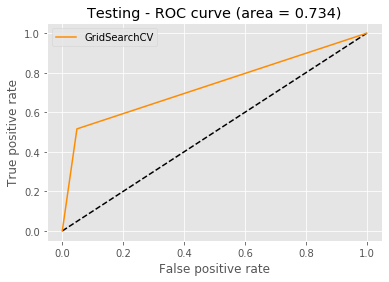

[[16 15]
 [ 5 99]]

accuracy................. 0.8519
precision................ 0.8684
recall................... 0.9519
auc...................... 0.7340
F1 macro................. 0.7618
F1 micro................. 0.8519
F1 weighted.............. 0.8410
F1 binary................ 0.6154


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.015, loss='deviance', max_depth=10,
                           max_features=14, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=20, min_samples_split=0.3,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.99, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [424]:
model = train_gs_gradient_boosting(_x, 'canceled')

model.best_estimator_

In [265]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_required_parameters',
 '_run_search',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'refit_time_',
 'return_train_score',
 'score',
 'scorer_',
 'scoring',
 '

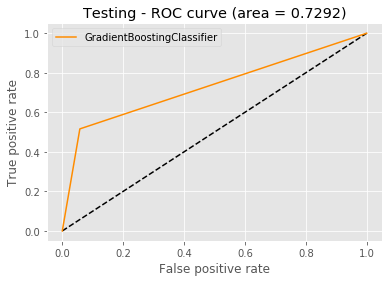

[[16 15]
 [ 6 98]]

accuracy................. 0.8444
precision................ 0.8673
recall................... 0.9423
auc...................... 0.7292
F1 macro................. 0.7535
F1 micro................. 0.8444
F1 weighted.............. 0.8345
F1 binary................ 0.6038


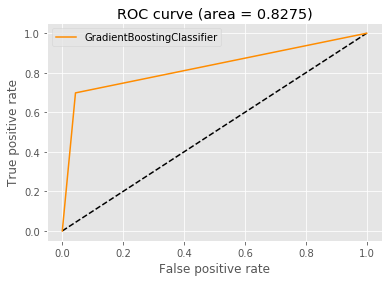

[[1060  458]
 [ 224 4942]]

accuracy................. 0.8980
precision................ 0.9152
recall................... 0.9566
auc...................... 0.8275
F1 macro................. 0.8460
F1 micro................. 0.8980
F1 weighted.............. 0.8948
F1 binary................ 0.7566


In [17]:
model = train_gradient_boosting(_x, 'canceled')

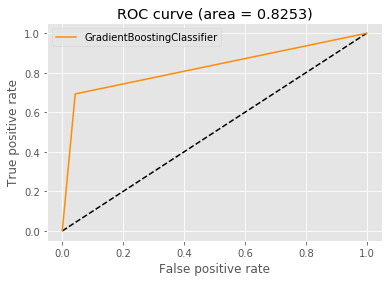

[[1052  466]
 [ 219 4947]]

accuracy................. 0.8975
precision................ 0.9139
recall................... 0.9576
auc...................... 0.8253
F1 macro................. 0.8448
F1 micro................. 0.8975
F1 weighted.............. 0.8942
F1 binary................ 0.7544


In [36]:
model = train_gradient_boosting(_x, 'canceled')

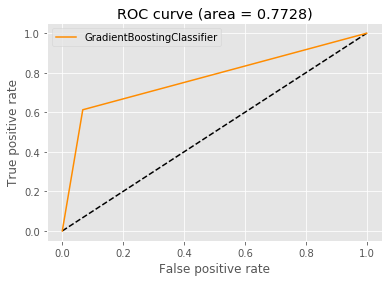

[[19 12]
 [ 7 97]]

accuracy................. 0.8593
precision................ 0.8899
recall................... 0.9327
auc...................... 0.7728
F1 macro................. 0.7887
F1 micro................. 0.8593
F1 weighted.............. 0.8547
F1 binary................ 0.6667


In [43]:
model = train_gradient_boosting(_x, 'canceled')

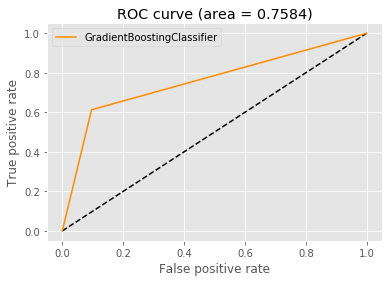

[[19 12]
 [10 94]]

accuracy................. 0.8370
precision................ 0.8868
recall................... 0.9038
auc...................... 0.7584
F1 macro................. 0.7643
F1 micro................. 0.8370
F1 weighted.............. 0.8351
F1 binary................ 0.6333


In [13]:
model = train_gradient_boosting(_x, 'canceled')

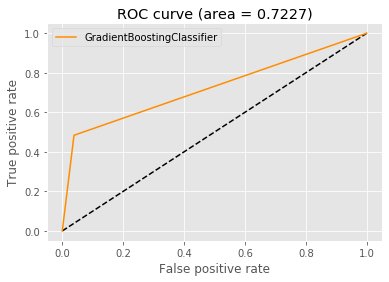

[[ 15  16]
 [  4 100]]

accuracy................. 0.8519
precision................ 0.8621
recall................... 0.9615
auc...................... 0.7227
F1 macro................. 0.7545
F1 micro................. 0.8519
F1 weighted.............. 0.8381
F1 binary................ 0.6000


In [107]:
model = train_gradient_boosting(_x, 'canc')

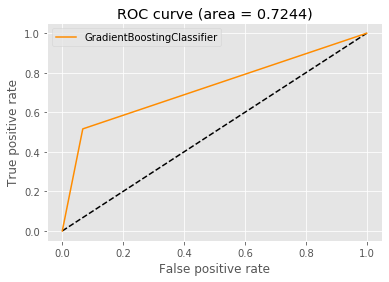

[[16 15]
 [ 7 97]]

accuracy................. 0.8370
precision................ 0.8661
recall................... 0.9327
auc...................... 0.7244
F1 macro................. 0.7454
F1 micro................. 0.8370
F1 weighted.............. 0.8280
F1 binary................ 0.5926


In [101]:
model = train_gradient_boosting(_x, 'canc')

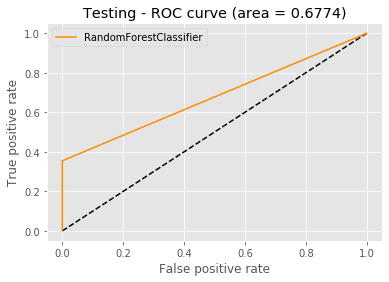

[[ 11  20]
 [  0 104]]

accuracy................. 0.8519
precision................ 0.8387
recall................... 1.0000
auc...................... 0.6774
F1 macro................. 0.7180
F1 micro................. 0.8519
F1 weighted.............. 0.8231
F1 binary................ 0.5238


In [426]:
model = train_random_forest(_x, 'canceled')

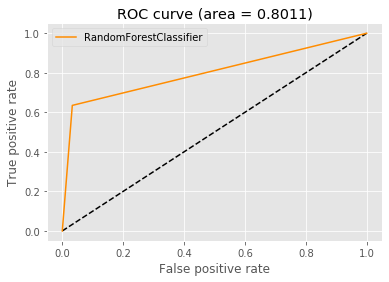

[[ 964  554]
 [ 170 4996]]

accuracy................. 0.8917
precision................ 0.9002
recall................... 0.9671
auc...................... 0.8011
F1 macro................. 0.8297
F1 micro................. 0.8917
F1 weighted.............. 0.8858
F1 binary................ 0.7270


In [13]:
model = train_random_forest(_x, 'canceled')

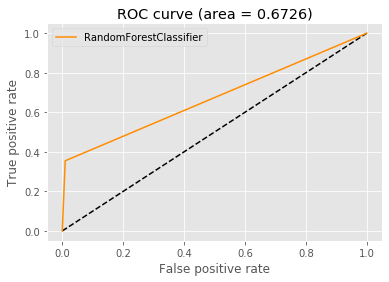

[[ 11  20]
 [  1 103]]

accuracy................. 0.8444
precision................ 0.8374
recall................... 0.9904
auc...................... 0.6726
F1 macro................. 0.7096
F1 micro................. 0.8444
F1 weighted.............. 0.8166
F1 binary................ 0.5116


In [44]:
model = train_random_forest(_x, 'canceled')

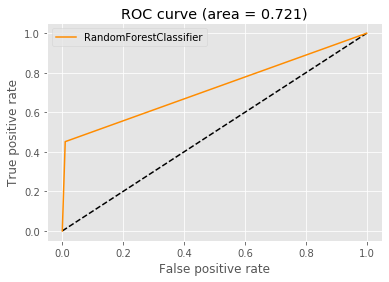

[[ 14  17]
 [  1 103]]

accuracy................. 0.8667
precision................ 0.8583
recall................... 0.9904
auc...................... 0.7210
F1 macro................. 0.7642
F1 micro................. 0.8667
F1 weighted.............. 0.8482
F1 binary................ 0.6087


In [14]:
model = train_random_forest(_x, 'canceled')

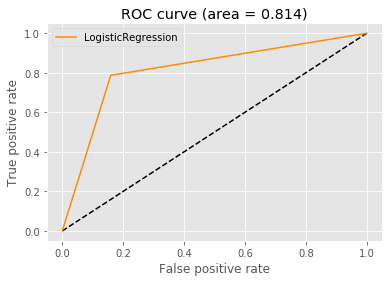

[[1195  323]
 [ 823 4343]]

accuracy................. 0.8285
precision................ 0.9308
recall................... 0.8407
auc...................... 0.8140
F1 macro................. 0.7797
F1 micro................. 0.8285
F1 weighted.............. 0.8363
F1 binary................ 0.6759


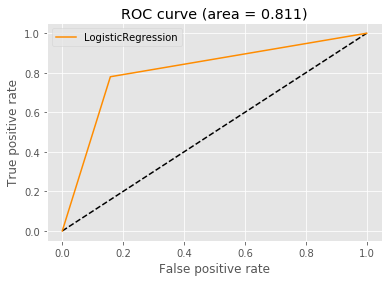

[[1184  334]
 [ 816 4350]]

accuracy................. 0.8279
precision................ 0.9287
recall................... 0.8420
auc...................... 0.8110
F1 macro................. 0.7782
F1 micro................. 0.8279
F1 weighted.............. 0.8355
F1 binary................ 0.6731


In [14]:
model = train_logistic_regression(_x, 'canceled')

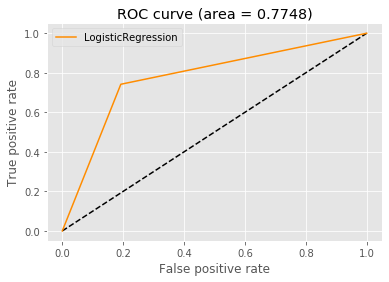

[[23  8]
 [20 84]]

accuracy................. 0.7926
precision................ 0.9130
recall................... 0.8077
auc...................... 0.7748
F1 macro................. 0.7394
F1 micro................. 0.7926
F1 weighted.............. 0.8031
F1 binary................ 0.6216


In [45]:
model = train_logistic_regression(_x, 'canceled')

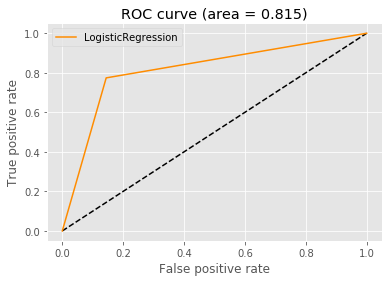

[[24  7]
 [15 89]]

accuracy................. 0.8370
precision................ 0.9271
recall................... 0.8558
auc...................... 0.8150
F1 macro................. 0.7879
F1 micro................. 0.8370
F1 weighted.............. 0.8431
F1 binary................ 0.6857


In [16]:
model = train_logistic_regression(_x, 'canceled')

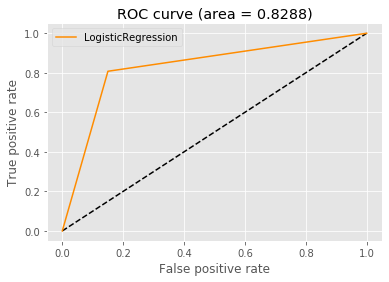

[[ 63  15]
 [ 42 238]]

accuracy................. 0.8408
precision................ 0.9407
recall................... 0.8500
auc...................... 0.8288
F1 macro................. 0.7908
F1 micro................. 0.8408
F1 weighted.............. 0.8485
F1 binary................ 0.6885


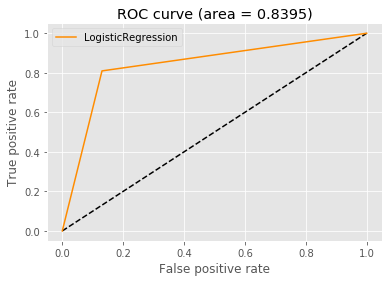

[[17  4]
 [ 9 60]]

accuracy................. 0.8556
precision................ 0.9375
recall................... 0.8696
auc...................... 0.8395
F1 macro................. 0.8128
F1 micro................. 0.8556
F1 weighted.............. 0.8605
F1 binary................ 0.7234


In [174]:
model = train_logistic_regression(_x, 'canceled')

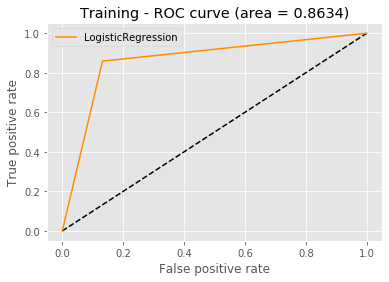

[[ 67  11]
 [ 37 243]]

accuracy................. 0.8659
precision................ 0.9567
recall................... 0.8679
auc...................... 0.8634
F1 macro................. 0.8232
F1 micro................. 0.8659
F1 weighted.............. 0.8722
F1 binary................ 0.7363


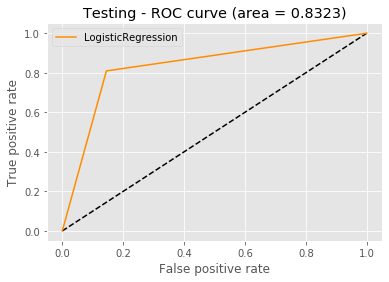

[[17  4]
 [10 59]]

accuracy................. 0.8444
precision................ 0.9365
recall................... 0.8551
auc...................... 0.8323
F1 macro................. 0.8011
F1 micro................. 0.8444
F1 weighted.............. 0.8506
F1 binary................ 0.7083


In [192]:
model = train_logistic_regression(_x, 'canceled')

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


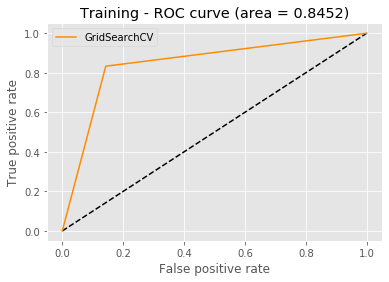

[[ 65  13]
 [ 40 240]]

accuracy................. 0.8520
precision................ 0.9486
recall................... 0.8571
auc...................... 0.8452
F1 macro................. 0.8055
F1 micro................. 0.8520
F1 weighted.............. 0.8591
F1 binary................ 0.7104


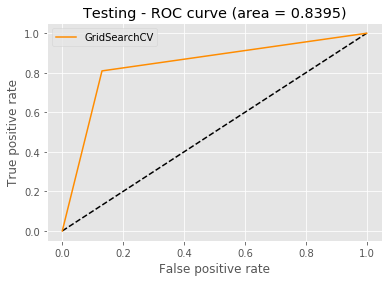

[[17  4]
 [ 9 60]]

accuracy................. 0.8556
precision................ 0.9375
recall................... 0.8696
auc...................... 0.8395
F1 macro................. 0.8128
F1 micro................. 0.8556
F1 weighted.............. 0.8605
F1 binary................ 0.7234


In [224]:
from sklearn.model_selection import GridSearchCV

model = train_gs_logistic_regression(_x, 'canceled')

In [408]:
model.best_params_

{'learning_rate': 0.25,
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 100,
 'min_samples_split': 0.1,
 'n_estimators': 100,
 'subsample': 0.99}

Fitting 10 folds for each of 350 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 235 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 622 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 910 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 1262 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 1678 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done 2158 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2702 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3310 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed:  2.3min finished
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


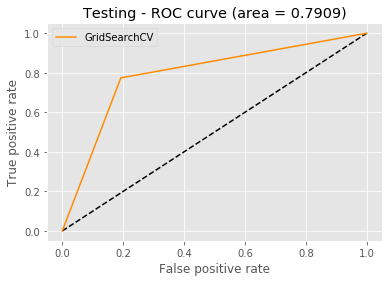

[[24  7]
 [20 84]]

accuracy................. 0.8000
precision................ 0.9231
recall................... 0.8077
auc...................... 0.7909
F1 macro................. 0.7508
F1 micro................. 0.8000
F1 weighted.............. 0.8107
F1 binary................ 0.6400


In [379]:
from sklearn.model_selection import GridSearchCV

model = train_gs_logistic_regression(_x, 'canceled')

In [320]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_required_parameters',
 '_run_search',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'refit_time_',
 'return_train_score',
 'score',
 'scorer_',
 'scoring',
 '

In [324]:
model.best_score_

0.49885355306419754